In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-original-films-imdb-scores/NetflixOriginals.csv


In [2]:
# Importing
import matplotlib as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [3]:
path = '/kaggle/input/netflix-original-films-imdb-scores/NetflixOriginals.csv'

df = pd.read_csv(path, encoding='latin-1')
df.head()


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [4]:
df.shape

(584, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [6]:
df.Genre.value_counts()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64

In [7]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


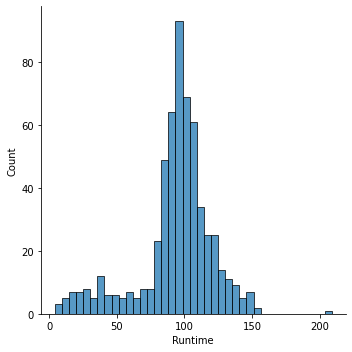

In [8]:
sns.displot(df['Runtime'])

# 1. Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? 

In [9]:
df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False)
                              

,Runtime
Language,
English/Akan,136.000000
Khmer/English/French,136.000000
Marathi,121.666667
English/Korean,121.000000
Spanish/Catalan,116.000000
Korean,115.833333
Hindi,115.787879
English/Arabic,114.000000
Indonesian,103.777778


In [10]:
runtimeSort = df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False).reset_index()
fig = px.bar(data_frame=runtimeSort, x=runtimeSort.Language, y=runtimeSort.Runtime)
fig.show()


# 2. 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.


In [11]:
df["Date"] = pd.to_datetime(df.Premiere)

DateSort = df.loc[(df["Genre"] == "Documentary") & (df["Date"] > "2019-01-31") & (df["Date"] < "2020-06-01")]
DateSortFig = px.bar(DateSort, x=DateSort.Title, y = DateSort["IMDB Score"])
DateSortFig.show()

# 3.İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?
 

In [12]:

a = df.loc[(df["Language"] == "English")]
b = a.sort_values("IMDB Score",ascending=False)
c = b[b["IMDB Score"]>7.5]

fig = px.bar(c, x=c["IMDB Score"],y=c.Title, color = c.Genre)
fig

# 4.'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?


In [13]:
#'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

Hindi = df.loc[(df["Language"] == "Hindi")]
b = Hindi.Runtime
b.mean()

115.78787878787878

# 5. 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.
# 

In [14]:
df.Genre.nunique()

115

In [15]:
df.Genre.unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

In [16]:
GenreLenght = df.Genre.unique()
len(GenreLenght)

115

In [17]:
genre = df.Genre.value_counts().nlargest(20) 
genre

Documentary                 159
Drama                        77
Comedy                       49
Romantic comedy              39
Thriller                     33
Comedy-drama                 14
Crime drama                  11
Biopic                        9
Horror                        9
Action                        7
Romance                       6
Concert Film                  6
Aftershow / Interview         6
Animation                     5
Action comedy                 5
Romantic drama                5
Psychological thriller        4
Science fiction/Thriller      4
Variety show                  4
Science fiction               4
Name: Genre, dtype: int64

In [18]:
genre.index

Index(['Documentary', 'Drama', 'Comedy', 'Romantic comedy', 'Thriller',
       'Comedy-drama', 'Crime drama', 'Biopic', 'Horror', 'Action', 'Romance',
       'Concert Film', 'Aftershow / Interview', 'Animation', 'Action comedy',
       'Romantic drama', 'Psychological thriller', 'Science fiction/Thriller',
       'Variety show', 'Science fiction'],
      dtype='object')

In [19]:
fig = px.bar(data_frame=genre, x=genre.index, y=genre.values, labels={"y":"Genre Movies", "index":"Genres"})

fig.show()

# 6. #Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.


In [20]:
#Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.
df.Language.unique()


array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

In [21]:
df.Language.value_counts()

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
Turkish                         5
English/Spanish                 5
Polish                          3
Dutch                           3
Marathi                         3
English/Hindi                   2
Thai                            2
English/Mandarin                2
English/Japanese                2
Filipino                        2
English/Russian                 1
Bengali                         1
English/Arabic                  1
English/Korean                  1
Spanish/English                 1
Tamil                           1
English/Akan                    1
Khmer/English/French            1
Swedish                         1
Georgian      

In [22]:
top_3_lang = df.Language.value_counts().nlargest(3)
top_3_lang

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

In [23]:
fig = px.bar(top_3_lang, x=top_3_lang.index, y=top_3_lang.values, labels={"y":"Count", "index":"Language"})
fig.show()

# 7. #IMDB puanı en yüksek olan ilk 10 film hangileridir?

In [24]:
#IMDB puanı en yüksek olan ilk 10 film hangileridir?
top_10_imdb = df.sort_values("IMDB Score",ascending=False)
top_10_imdb = top_10_imdb[0:10]
top_10_imdb

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020-12-08
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015-10-09
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,2020-05-20
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English,2019-10-23
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English,2017-11-24
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English,2019-11-15
571,13th,Documentary,"October 7, 2016",100,8.2,English,2016-10-07


In [25]:
fig = px.bar(top_10_imdb, x=top_10_imdb["IMDB Score"],y=top_10_imdb.Title, color = top_10_imdb.Genre)
fig.show()

# 8. #IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.


In [26]:
#IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.
df["Runtime"].corr(df["IMDB Score"])


-0.04089629142078858

In [27]:
df[["IMDB Score", "Runtime"]].corr()

,IMDB Score,Runtime
IMDB Score,1.000000,-0.040896
Runtime,-0.040896,1.000000


In [28]:
df[["Runtime", "IMDB Score"]].corr()

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


In [29]:
fig = px.scatter(data_frame=df, x="IMDB Score", y="Runtime")
fig.update_layout(autosize=False, width=800, height=600,)

fig.show()

Belirli bir dağılım görünmüyor.

# 9. #IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.


In [30]:
#IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.
df.groupby("Genre")["IMDB Score"].nlargest(10)


Genre            
Action        372    6.7
              277    6.3
              220    6.1
              153    5.7
              50     4.9
                    ... 
War-Comedy    219    6.0
Western       516    7.3
              237    6.1
              49     4.8
Zombie/Heist  194    5.9
Name: IMDB Score, Length: 272, dtype: float64

In [31]:
top_10_genre =df[["Title","Genre","Premiere","Runtime","IMDB Score","Language"]].sort_values(["IMDB Score"], ascending=False)[:10]
top_10_genre

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English
571,13th,Documentary,"October 7, 2016",100,8.2,English


In [32]:
fig = px.scatter(top_10_genre, y= 'Genre', x='IMDB Score', hover_data = top_10_genre[['Genre','Premiere','Language']], color='Genre', 
                 title = "Top 10 High Rated Genre")

fig.show()



# 10. #'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.


In [33]:
#'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

top_10_ratings = df[["Title","Genre","Premiere","Runtime","IMDB Score","Language"]].sort_values(["Runtime"], ascending=False)[:10]
top_10_ratings

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English
328,Da 5 Bloods,War drama,"June 12, 2020",155,6.5,English
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
247,Citation,Drama,"November 6, 2020",151,6.2,English
284,The Forest of Love,Drama,"October 11, 2019",151,6.3,Japanese
509,Raat Akeli Hai,Thriller,"July 31, 2020",149,7.3,Hindi
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
543,Ludo,Anthology/Dark comedy,"November 12, 2020",149,7.6,Hindi
194,Army of the Dead,Zombie/Heist,"May 21, 2021",148,5.9,English
5,Drive,Action,"November 1, 2019",147,3.5,Hindi


In [34]:
fig = px.scatter(top_10_ratings, y= 'Title', x='Runtime', hover_data = top_10_ratings[['Genre','Premiere','Language']], color='Genre', 
                 title = "Top 10 High Rated Programs")

fig.show()

# 11. #Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.


In [35]:
#Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.
df['Year'] = df['Date'].dt.year
year = df.Year.value_counts()

year

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Year, dtype: int64

In [36]:
year.index

Int64Index([2020, 2019, 2018, 2021, 2017, 2016, 2015, 2014], dtype='int64')

In [37]:
year.values

array([183, 125,  99,  71,  66,  30,   9,   1])

In [38]:
fig = px.bar(data_frame=df, x=year.index, y=year.values, labels={"y":"Count of Movies per each Year", "x":"Year"})
fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()

# 12. #Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.


In [39]:
#Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.
low_10_mov = df[["Title","Genre","Premiere","Runtime","IMDB Score","Language"]].sort_values(["IMDB Score"], ascending=True)[:10]
low_10_mov

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi


In [40]:
low_10_mov = df.groupby("Language")["IMDB Score"].mean().nsmallest(15)
low_10_mov

Language
Malay               4.200000
English/Japanese    4.400000
Filipino            5.100000
Norwegian           5.100000
Polish              5.166667
Thai                5.450000
Swedish             5.500000
Italian             5.542857
Spanish/Basque      5.600000
German              5.640000
Turkish             5.660000
French              5.770000
Dutch               5.800000
Indonesian          5.844444
Korean              5.916667
Name: IMDB Score, dtype: float64

In [41]:

fig = px.bar(low_10_mov, x=low_10_mov.index, y=low_10_mov.values, 
             labels={'y':'Average Rating Score', 'x':'Language'})

fig.show()

# 13. #Hangi yılın toplam "runtime" süresi en fazladır?


In [42]:
#Hangi yılın toplam "runtime" süresi en fazladır?
df[df.Runtime == df.Runtime.max()]["Premiere"]

561    November 27, 2019
Name: Premiere, dtype: object

In [43]:
year = df.Year.value_counts()
RunYear = df.groupby("Year").agg({"Runtime": "sum"}).sort_values(by="Runtime", ascending=False)
fig = px.bar(data_frame=RunYear, x=RunYear.index, y=RunYear.Runtime)
fig.show()

# 14. #Her bir dilin en fazla kullanıldığı "Genre" nedir?


In [44]:
#Her bir dilin en fazla kullanıldığı "Genre" nedir?
dLanguage = df.groupby(["Language"])["Genre"].value_counts().groupby(level=0, group_keys=False).head(1)
dLanguage


Language                    Genre                
Bengali                     Documentary                1
Dutch                       Crime drama                1
English                     Documentary              120
English/Akan                War drama                  1
English/Arabic              Documentary                1
English/Hindi               Documentary                2
English/Japanese            Crime drama                1
English/Korean              Action-adventure           1
English/Mandarin            Documentary                2
English/Russian             Documentary                1
English/Spanish             Documentary                5
English/Swedish             Documentary                1
English/Taiwanese/Mandarin  Drama                      1
English/Ukranian/Russian    Documentary                1
Filipino                    Drama                      1
French                      Documentary                6
Georgian                    Documentar